# Classification And Regression Trees (CART)

decision trees modeling non-linear relationships by carving out **rectangular regions** in the feature space

- response can be categorical (classification tree) or quantitative (regression tree)

- yields a set of interpretable decision rules, e.g., if BMI > 18, then ...

- predictive ability is **mediocre** , but can be improved with **resampling**


decision trees are similar to KNN

both produce simple predictions (averaging for regression/maximally occuring for classification) based on "neighborhoods" in the feature space

but decision trees use **adaptive** neighborhoods

# ad & dis of trees

## ad

- intuitive

- prediction rules is interpretable, easy to explain

  split decision rules can be various, e.g., $X>3$, a linear function
  
  simple decision rules help tree smooth

- sensitive to underlying data

- inbuilt feature selection

    irrelevant covariates won't be used as often as splits
    
- simple, fast implementation, perfom well with large datasets

## dis

- instability

    **full** trees can have high variance
    
    as data change, tree topology can change dramatically, making interpretation difficult


- greedy algorithm

    can't guarantee to find globally optimal decision tree
    
    
- lack of smoothness

    splits lead to a "jagged" decision boundary 凹凸不平的
    
    produce non-smooth prediction surfaces
    
    especially problematic for regression than classification
    
    
- hard to capture **additive** structure

    if actual model is additive, may not be captured by tree with limited data
    

- prediction accuracy (performance) can be so-so

# trees vs. linear methods

trees are not always better or worse than linear methods, it depends on the problem (data points)

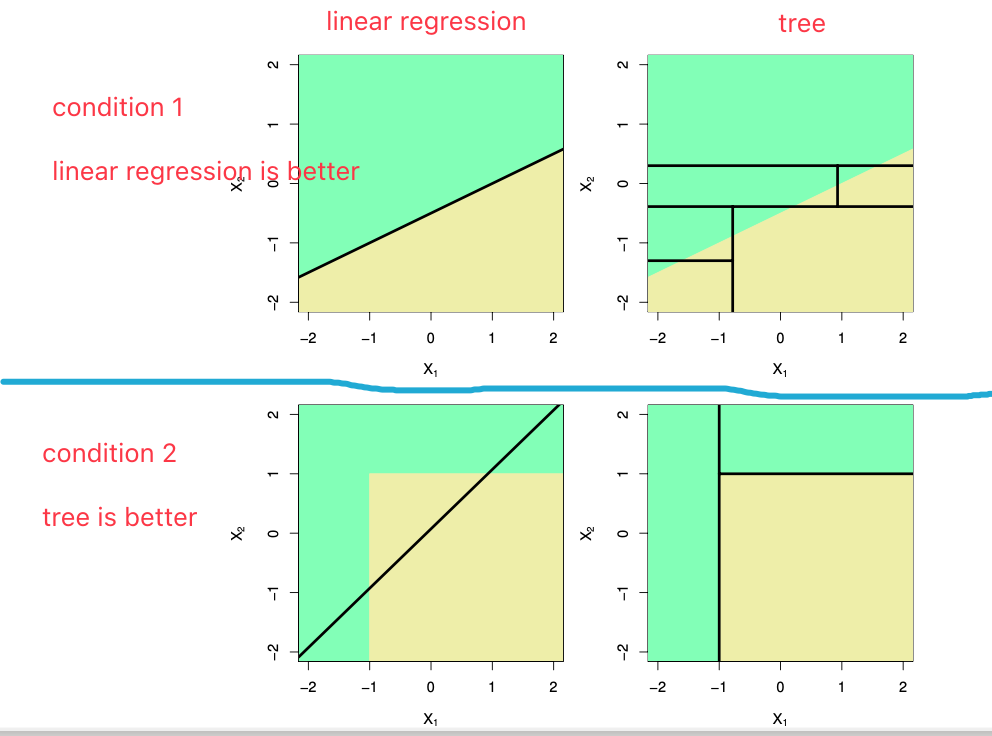

# tree terminology

a decision tree is a tree growing upside down with **root** at the top

root: an internal node at the top, only one

internal nodes: points where predictor space is split

terminal nodes (leaves): points at the ends of the tree where no further splitting occurs

disjoint region of terminal nodes (rectangle): denote as $R_1,...,R_J$, the J regions cover the whole predictor space


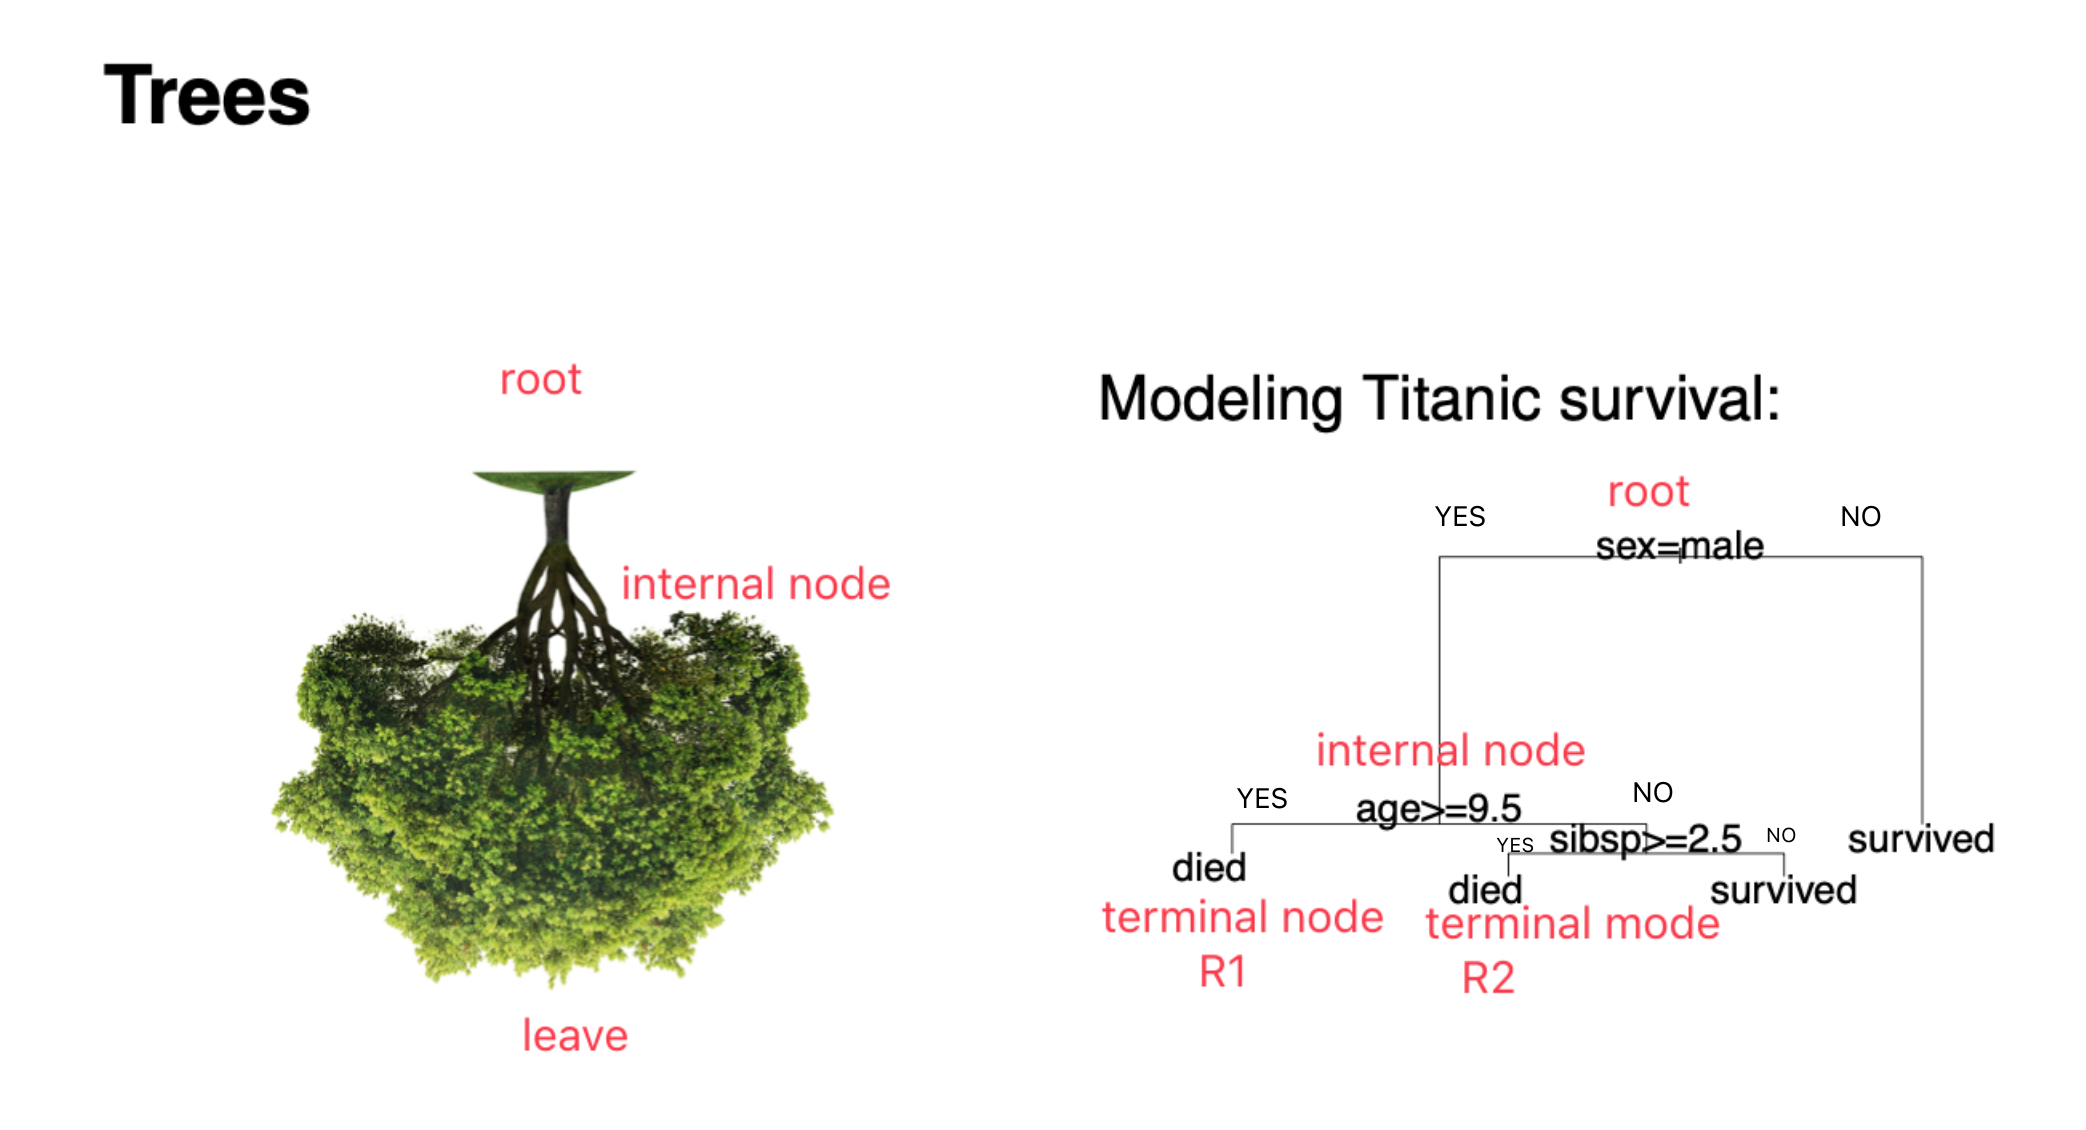

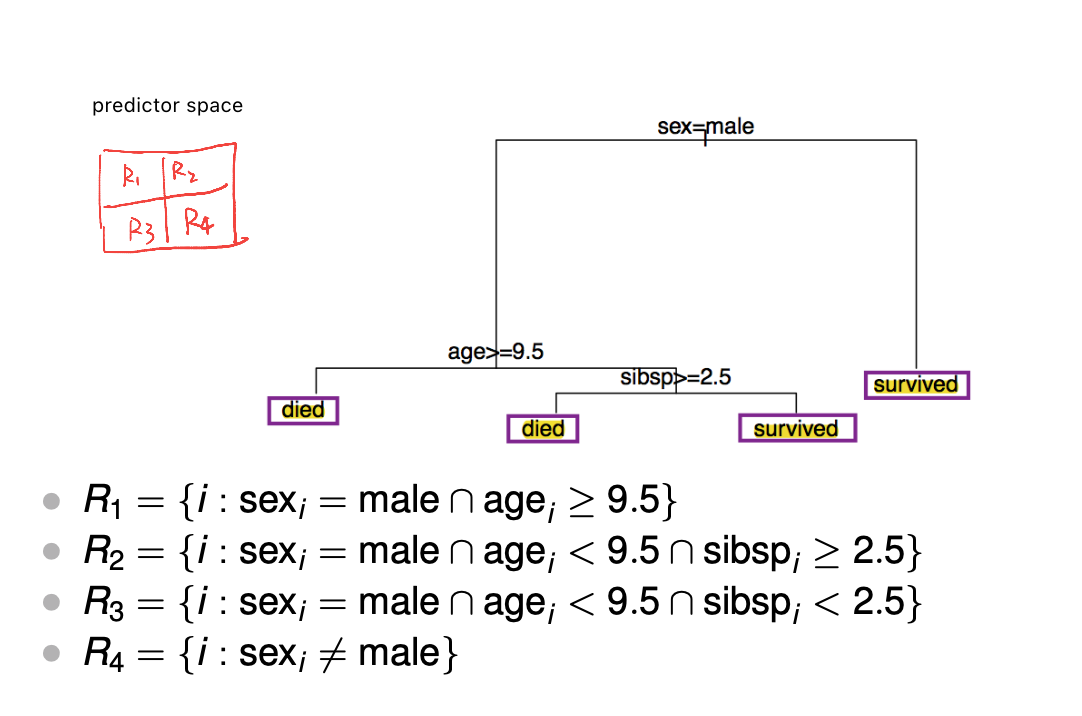

# training (build tree)

**key points** for training is find proper set of regions $\left\{R_1,...,R_J\right\}$ that best describes relationship between $X$ and $Y$

we training (building a binary tree) by a greedy approach

- recursive binary partitioning: first recursively binary split predictor region until certain threshold

- Tree Pruning: then prune back the tree 

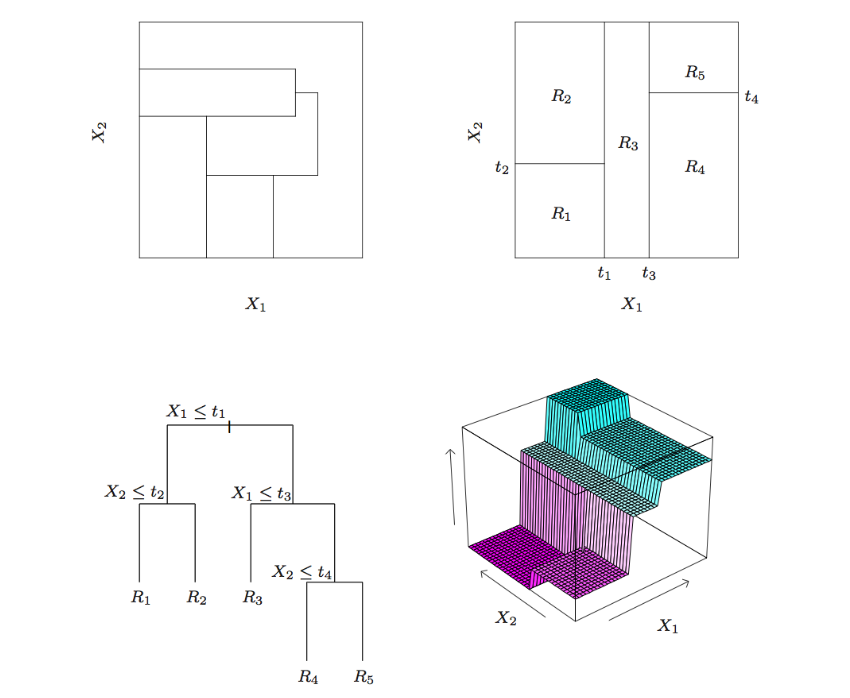

## splitting criterion (how to find the best cutpoint?)

### regression tree

- for regression, we want to minimize the training error: **Residual Sum of Squares (RSS)**

$$
RSS=\sum_{j=1}^J \sum_{i \in R_j}(Y_i-\bar Y_{R_j})^2
$$

- recall that linear regression fits **additive** models:

    where $p$ is the number of features

$$
f(X)=\beta_0 + \sum_{j=1}^p X_j \beta_j
$$

- regression tree fits linear regression model with a bunch of **indicators**

    where $J$ is the number of disjoint regions (leaf nodes)

$$
f(X)=\sum_{j=1}^J \beta_j \mathbb{1}(X \in R_j)
$$


- $\mathbb{1}(X \in R_j)$ is **adaptive feature**

    we build $J$ new features and learn parameters $\beta_j$

#### continuous predictors

when $X$ is continuous, where can we draw a horizontal line or a vertical line that best splits the data into 2 homogeneous parts?

we have smart algorithm iterating thru years to decide "Years >= 4.5" is a best split
 
after every splitting, we can treat all the data points in a region as an independent data set

1. iterate through predictor $X_k$ for $k=1,...,p$

    for each $X_k$, 

    consider cutpoints $s$ (an unique value of $X_k$) that divide the region into **2 parts**

$$R_1(k,s)=\left\{i|X_{(i,k)}<s\right\} \text{ and } R_2(k,s)=\left\{i|X_{(i,k)}>s\right\}$$

compute sum of squared error
    
$$
Q_k(s)=SSL+SSR=\sum_{i\in R_1(k,s)}\left(Y_i-\bar Y_{R_1}\right)^2+\sum_{i\in R_2(k,s)}(Y_i-\bar Y_{R_2})^2
$$

pick $s_k$ with smallest $Q_k(s)$


2. make binary partition along each $s_k$ of $X_k$

3. repeat steps 1 and 2 on each regions iteratively,

    so called **recursive bianry partitioning**

4. once we stop, relabel the terminal nodes to be $R_1,...,R_J$

    compute $\bar Y_{R_j}$ or $\tilde Y_{R_j}$ to be $\hat Y$

##### e.g.: baseball hitter salaries

$y$: salaries

we have 2 predictors $x_1$, $x_2$

$x_1$ axis: RBI: Runs Batted In 击中球数

$x_2$ axis: Years: career years

using splitting criteria, we make 7 splitting of the training set, 
    
split whole predictor region into 8 disjoint regions


 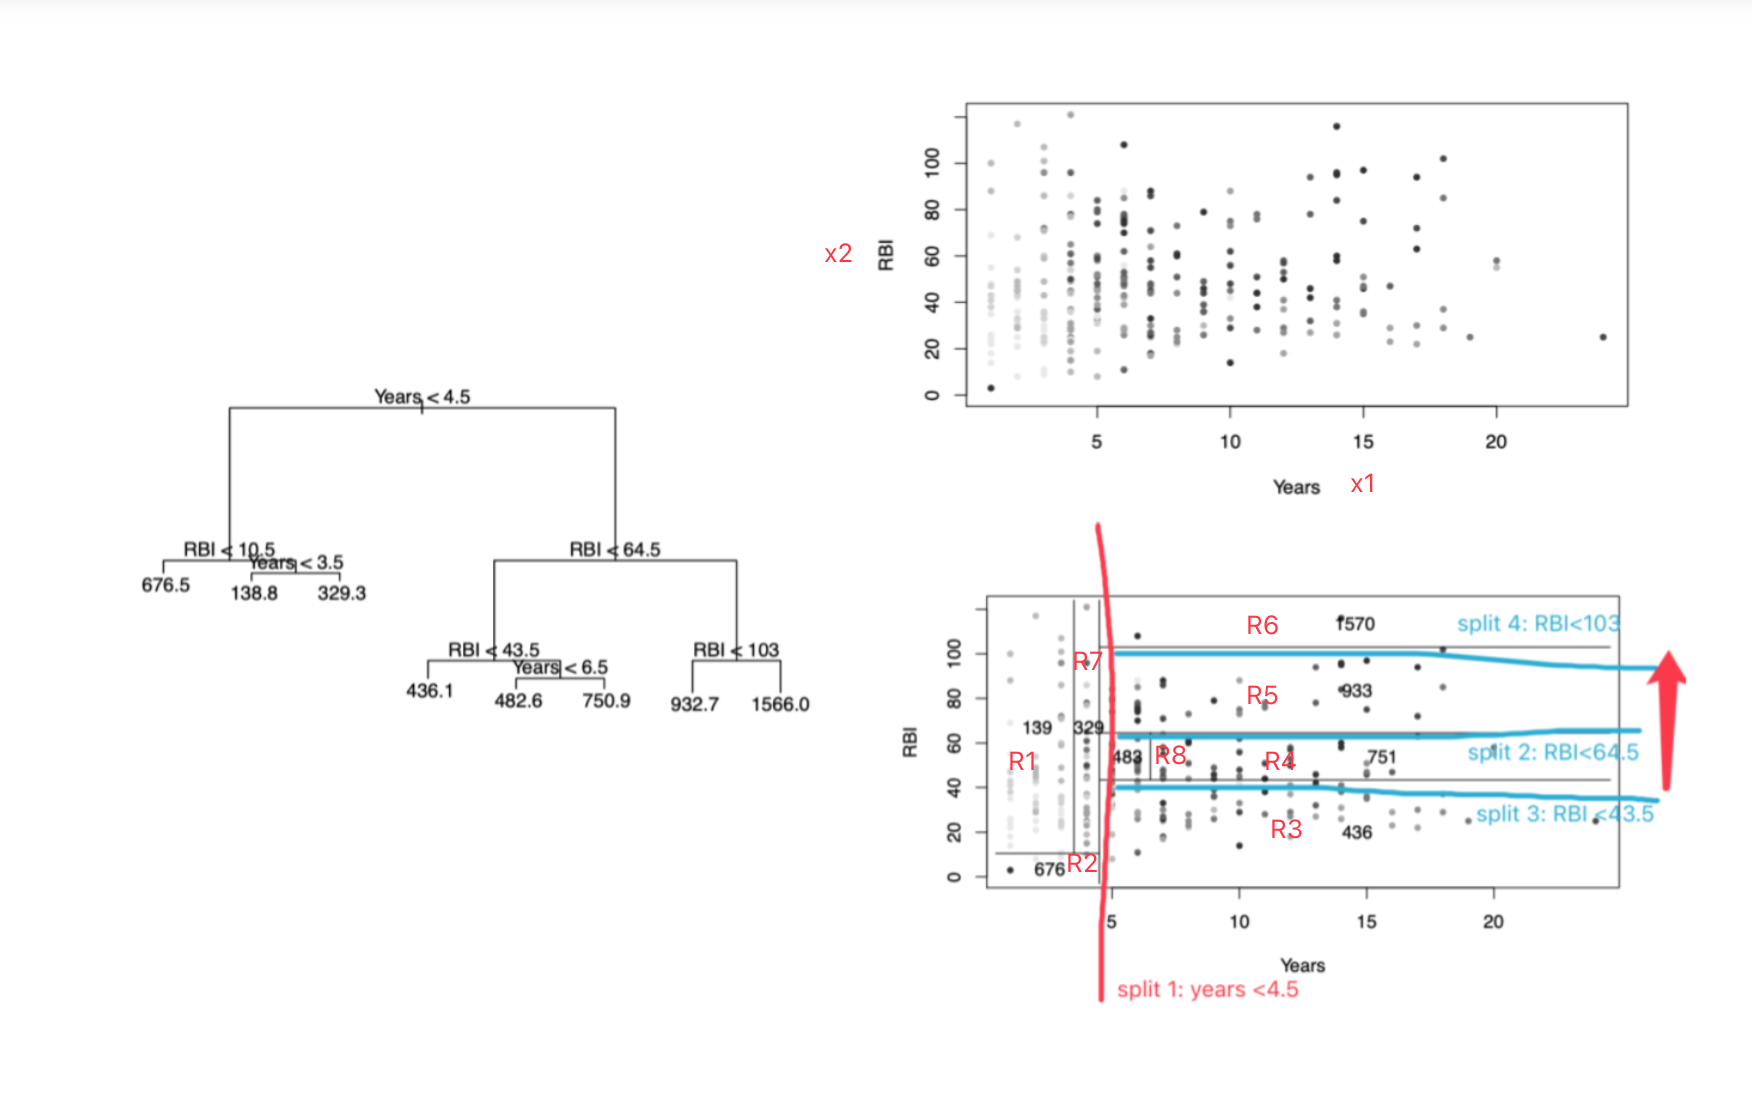

in baseball e.g. 

for $X_1=RBI$, compute $Q_{RBI}(s)$ for all distinct values of $X_1$

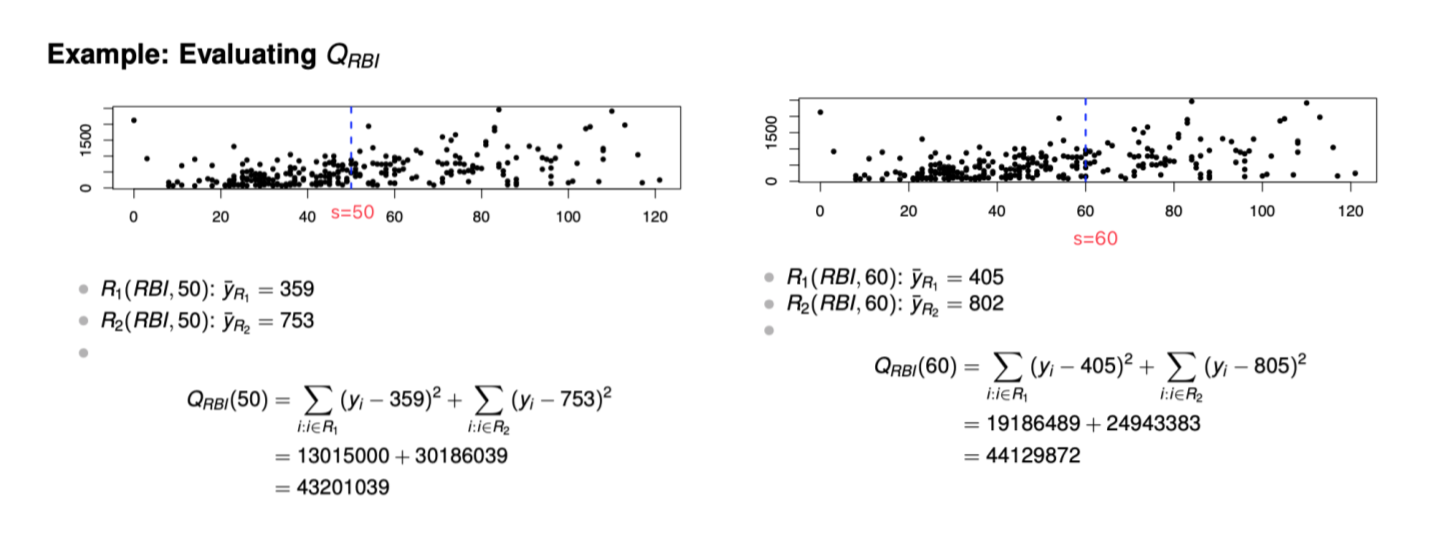

#### categorical predictors

suppose $X_k$ takes values in the set {A, B, C, D, E}

then the possible splits are:

- {D} VS. {A, B, C, E}

- {B, D} VS. {A, C, E}

...

same as continuous predictors, we choose split with **smallest RSS**

### classification tree

for classification, minimize Hamming loss, encourage higher **node purity**

#### impurity measures: Gini index

- **classification error**

$$
E=\sum_{j=1}^J |R_j| (1-\max_k (\hat p_{j,k}))
$$

where $J$ is the number of regions (leaf nodes),

$|R_j|$ is the number of observ in region $R_j$

$\hat p _{j,k}$ is the proportion of training observ labeled class $k$ in region $R_j$


- **Gini index**

$$
G=\sum_{j=1}^J |R_j| \sum_{k=1}^K \hat p_{j,k} (1-\hat p_{j,k})
$$

where $J$ is the number of regions (leaf nodes), $K$ is the number of different labels
    


- define node proportion of class $k$ in region $R_j$

$$
\hat p_{j,k} = \frac{1}{N_j}\sum_{x_i \in R_j}\mathbb{1}(y_i = k)
$$

where $N_j$ is the number of observ in region $R_j$


then the class of region $R_j$ is majority class in region $R_j$

$$
k(j)=\underset{k}{\arg \max} \hat p_{j,k}
$$

- misclassification error: 

$$
1- \hat p_{j,k(j)}
$$

- Gini index:

$$
\sum_{k=1}^K \hat p_{j,k}(1-\hat p_{j,k})
$$

e.g. a data set $(n=800)$ has 2 classes $({\color{Blue}{400}}, {\color{Red}{400}})$

2 splits options, which one is better?

1. left node $({\color{Blue}{300}}, {\color{Red}{100}})$, right node $({\color{Blue}{100}}, {\color{Red}{300}} )$


2. left node $({\color{Blue}{200}}, {\color{Red}{400}})$, right node $({\color{Blue}{200}}, {\color{Red}{0}})$
   

misclassification error is same

1.  $400\times (1-\frac{300}{400})+400\times (1-\frac{300}{400})=200$

2. $600\times (1-\frac{400}{600})+200\times (1-\frac{200}{200})=200$

Gini index is different:

1. $400(0.75\times 0.25+0.25\times 0.75)+400(0.25\times 0.75+0.75\times 0.25)=300$

2. $600(0.3\dot{3}\times 0.6\dot{6}+0.6\dot{6}\times 0.3\dot{3})+200(1\times 0+0\times 1)=267 < 300$

thus, option 2 is better

## stopping criteria (bias-variance tradeoff)

- hyperparameter of decision tree: tree depth, number of observations in a leaf node

- how to choose the right size of tree?

- a deeper tree = more leaves = high variance/flexibility/complexibility = less bias

stopping criteria:

- number of observ in a leaf node reached a minimum  e.g. <=5

- a leaf node has **only 1 data point**, then **prune tree back**, avoid overfitting

- depth of tree reached a maximum  e.g., <=100

    often used in **Boosting**

- no further splits can reduce RSS  e.g., RSS <=0.01

## tree pruning

to avoid overfitting, we can stop splitting until a leaf node has **only 1 data point**, 

then we **prune the tree back**, cut off useless leaves

we look at **subtrees** and compare how well the subtrees perform (RSS)

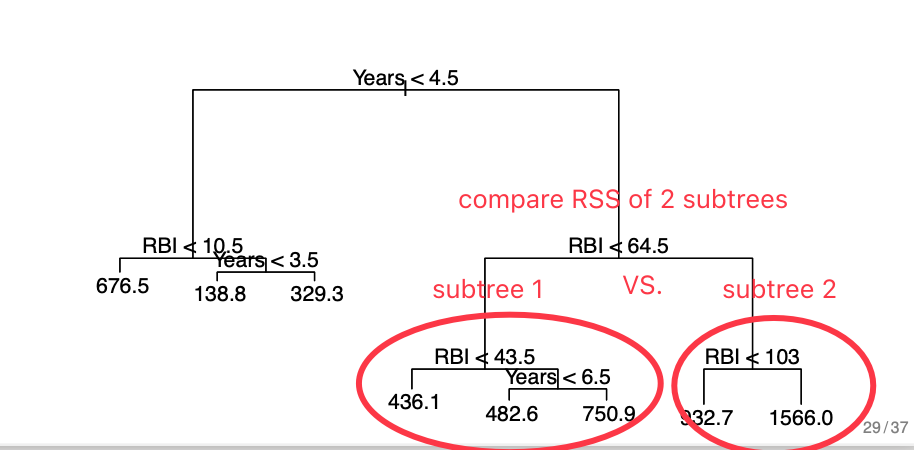

how do we prune?

- cross validation

- cost-complexity pruning (weakest link pruning)

### cost-complexity pruning

we want to minimize the cost-complexity function $C(T)$:

$$
\hat{T} = \underset{T}{\arg\min}C(T)=\sum_{j=1}^{|T|}\sum_{i \in R_j}\left(Y_i - \hat Y_{R_j}\right)^2 + \alpha |T|
$$

where the first item is training error, the second term is penalty for model complexity

$|T|$ is the number of regions (leaf nodes)

- hyperparameter $\alpha$ controls for complexity of model

    $\alpha=0$ means full tree

    larger $\alpha$ means higher penalty for complexity of model

The set of trees corresponding to different $\alpha$ form a seq of nested subtrees

it's computationally efficient to determine the seq

steps

1. grow a big tree on training set


2. obtain the optimal set of nested subtrees $T_l\subset ... \subset T_2 \subset T_1 \subset T_0$

corresponding to cost-complexity minimization problem

where $T_l$ is the node, $T_0$ is the whole tree

3. use k-fold Cross-validation to identify the subtree (optimal $\alpha$) that does best

# testing

we assign each test data point $X_{R_j}$ to a corresponding region (leaf $R_j$) based on the sequence of conditions, 
    
then we predict $\hat Y_{R_j}$ using all testing observs in $R_j$ by minimizing loss
    
$\hat Y_{R_j}$ is a function of all testing observs in $R_j$
    

1) for regression:
    
- if loss is mean squared loss, $\hat Y_{R_j}$ is the **mean** of all observs in $R_j$
    
$$
\hat Y_{R_j}=\bar Y_{i:i\in R_j}
$$
    
- if loss is mean absoluate deviation, $\hat Y_{R_j}$ is the **median** of all observs in $R_j$
    
$$
\hat Y_{R_j}=\tilde Y_{i:i\in R_j}
$$
    
    
2) for classification, using Hamming loss
    
$\hat Y_{R_j}$ is just the majority vote, i.e. most frequently occuring label $Y_i$ for $i \in R_j$

$$
\hat Y_{R_j}=\underset{k}{\arg \max}\  \hat p _{j,k}
$$

where $\hat p _{j,k}$ is the proportion of testing observ labeled $k$ in region $R_j$